# Bootstrap

The bootstrap is an alternative to the NHST framework already discussed. The primary benefit of the bootstrap is that it comes with fewer assumptions then the NHST framework. The only real assumption when doing a bootstrap approach is that the sample is obtained randomly from the population, an assumption already made in the NHST framework. The primary drawback of the bootstrap approach is that it is computationally expensive, therefore, it can take time to perform the procedure. 

## Bootstrapping Steps

The following are the steps when performing a bootstrap. 

1. Treat the sample data as the population.
2. Resample, with replacement, from the sample data, ensuring the new sample is the same size as the original. 
3. Estimate the model using the resampled data from step 2. 
4. Repeat steps 2 and 3 many many times (eg, 10,000 or more). 
5. Visualize distribution of effect of interest

## Resampling with replacement

What is meant by sampling with replacement? Let's do an example.

In [1]:
library(tidyverse)

fruit <- data.frame(name = c('watermelon', 'apple', 'orange', 
                             'kumquat', 'grapes', 'canteloupe', 
                             'kiwi', 'banana')) |>
    mutate(obs_num = 1:n())

fruit

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


name,obs_num
<chr>,<int>
watermelon,1
apple,2
orange,3
kumquat,4
grapes,5
canteloupe,6
kiwi,7
banana,8


In [6]:
slice_sample(fruit, n = nrow(fruit), replace = FALSE)

name,obs_num
<chr>,<int>
canteloupe,6
banana,8
orange,3
apple,2
kumquat,4
kiwi,7
watermelon,1
grapes,5


In [8]:
slice_sample(fruit, n = nrow(fruit), replace = TRUE)

name,obs_num
<chr>,<int>
watermelon,1
apple,2
kumquat,4
grapes,5
grapes,5
watermelon,1
orange,3
banana,8


In [9]:
8 ^ 8

[1] 16777216

In [10]:
4000 ^ 4000

[1] Inf

## More practical example

Let's load some data to do a more practical example. The following data come from a [TIMSS](https://nces.ed.gov/timss/) on science achievement. The data provided is a subset of the available data and is not intended to be representative. Below is a short description of the data. Please don’t hesitate to send any data related questions, happy to provide additional help on interpreting the data appropriately.

+ **IDSTUD**: A unique student ID 
+ **ITBIRTHM**: The birth month of the student 
+ **ITBIRTHY**: The birth year of the student 
+ **ITSEX**: The birth sex of the student 
+ **ASDAGE**: The age of the student (at time of test) 
+ **ASSSCI01**: Overall science scale score 
+ **ASSEAR01**: Earth science scale score 
+ **ASSLIF01**: Life science scale score 
+ **ASSPHY01**: Physics scale score 
+ **ASSKNO01**: Science knowing scale score 
+ **ASSAPP01**: Science applying scale score 
+ **ASSREA01**: Science reasoning scale score 

In [11]:
library(tidyverse)

timss <- readr::read_csv('https://raw.githubusercontent.com/lebebr01/psqf_6243/main/data/timss_grade4_science.csv') |> 
   filter(ASDAGE < 15)

head(timss)

Rows: 10029 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): IDSTUD, ITBIRTHM, ITBIRTHY, ITSEX, ASDAGE, ASSSCI01, ASSEAR01, ASS...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


IDSTUD,ITBIRTHM,ITBIRTHY,ITSEX,ASDAGE,ASSSCI01,ASSEAR01,ASSLIF01,ASSPHY01,ASSKNO01,ASSAPP01,ASSREA01
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10101,6,2005,2,9.92,504.5513,445.2919,408.2991,458.0210,529.5136,519.7842,543.8187
10102,10,2005,2,9.58,400.6735,291.2442,323.3329,296.5886,379.1956,385.0167,372.9960
10103,1,2005,1,10.33,542.0670,440.0107,528.8448,529.4147,521.0647,538.5045,535.2791
10104,6,2005,2,9.92,544.1907,534.2964,551.7017,557.1893,538.3842,540.3896,535.3284
10105,6,2005,2,9.92,588.0062,555.3388,499.9448,559.4732,532.7365,503.0834,460.8084
10106,12,2005,1,9.42,582.6241,556.1076,585.3797,561.5692,526.2867,573.1294,513.5148


## Two Guiding Questions

1. Is the age of a student related to their overall science scale score? 
2. Is the life science scale score related to the overall science scale score?

## Bivariate exploration

It is important to explore relationships bivariately before going to the model phase. To do this, fill in the outcome of interest in place of "%%" below and fill in the appropriate predictor in place of "^^". You may also want to fill in an appropriate axis labels in place of "@@" below. 

+ Summarize the bivariate association

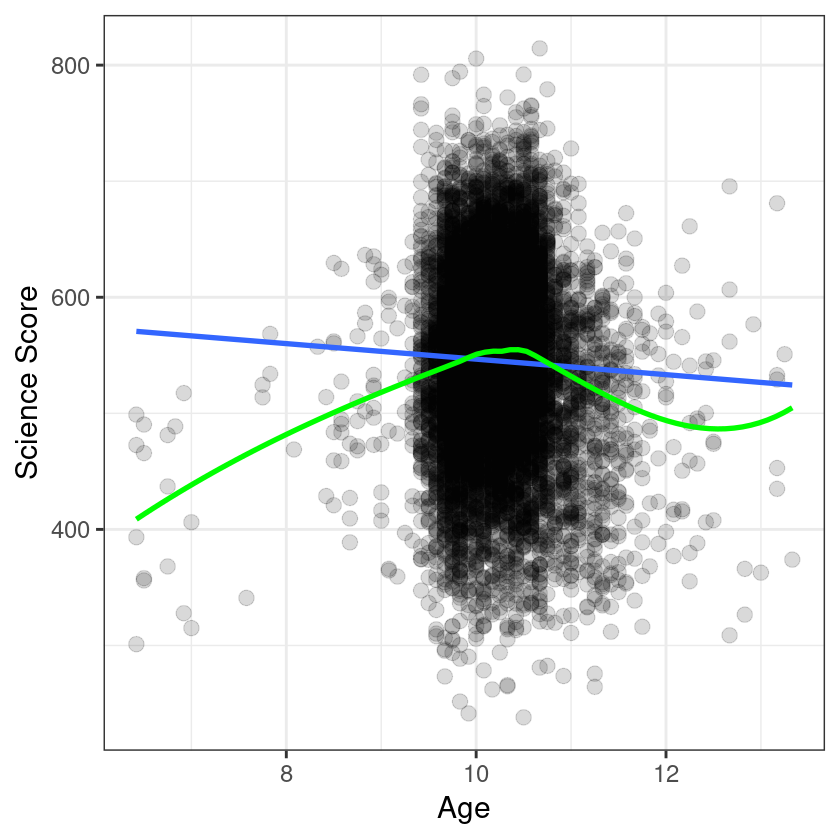

In [14]:
library(ggformula)

theme_set(theme_bw(base_size = 18))

gf_point(ASSSCI01 ~ ASDAGE, data = timss, size = 4, alpha = .15) |> 
  gf_smooth(method = 'lm', size = 1.5) |>
  gf_smooth(method = 'loess', size = 1.5, color = 'green') |>
  gf_labs(x = "Age",
          y = "Science Score")

In [21]:
mosaic::cor(ASSSCI01 ~ ASDAGE, data = timss) |> round(5)
mosaic::cor(ASSSCI01 ~ ASDAGE, data = filter(timss, ASDAGE >= 8 & ASDAGE <= 12)) |> round(5)

[1] -0.03999

[1] -0.04989

In [22]:
filter(timss, ASDAGE >= 8 & ASDAGE <= 12) |> nrow()
nrow(timss)

[1] 9962

[1] 10027

## Estimate Parameters

To do this, fill in the outcome of interest in place of "%%" below and fill in the appropriate predictor in place of "^^". 

+ Interpret the following parameter estimates in the context of the current problem. (ie., what do these parameter estimates mean?)

In [23]:
timss_model <- lm(ASSSCI01 ~ ASDAGE, data = timss)

summary(timss_model)
confint(timss_model)


Call:
lm(formula = ASSSCI01 ~ ASDAGE, data = timss)

Residuals:
     Min       1Q   Median       3Q      Max 
-305.769  -51.969    4.919   56.707  272.217 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  613.563     17.064  35.956  < 2e-16 ***
ASDAGE        -6.687      1.669  -4.007 6.18e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 80.89 on 10025 degrees of freedom
Multiple R-squared:  0.001599,	Adjusted R-squared:  0.0015 
F-statistic: 16.06 on 1 and 10025 DF,  p-value: 6.183e-05


,2.5 %,97.5 %
(Intercept),580.114047,647.012616
ASDAGE,-9.957345,-3.415915


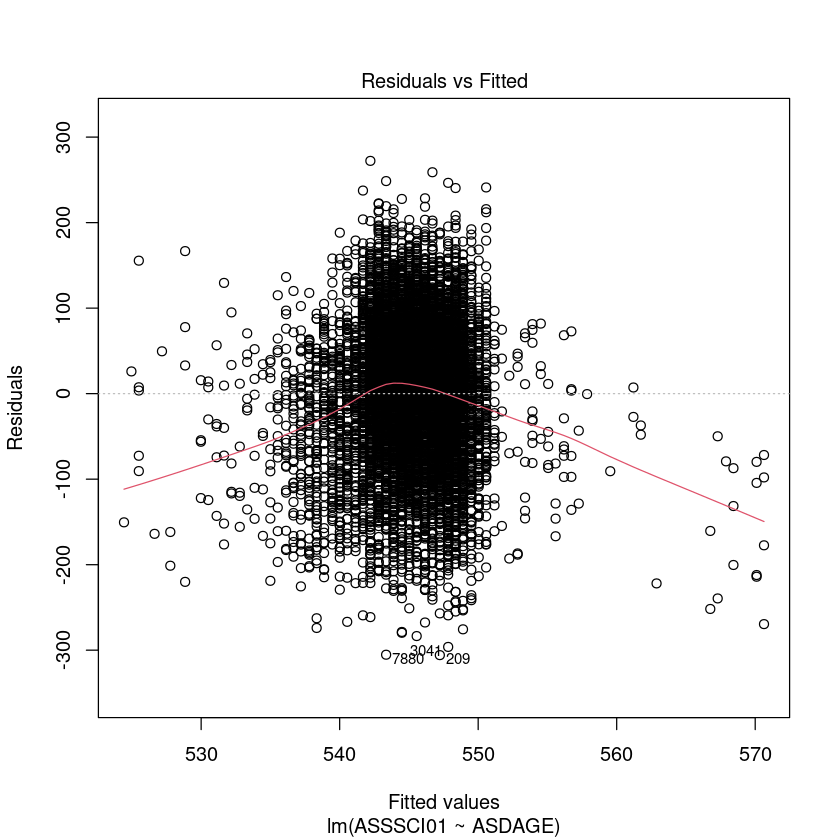

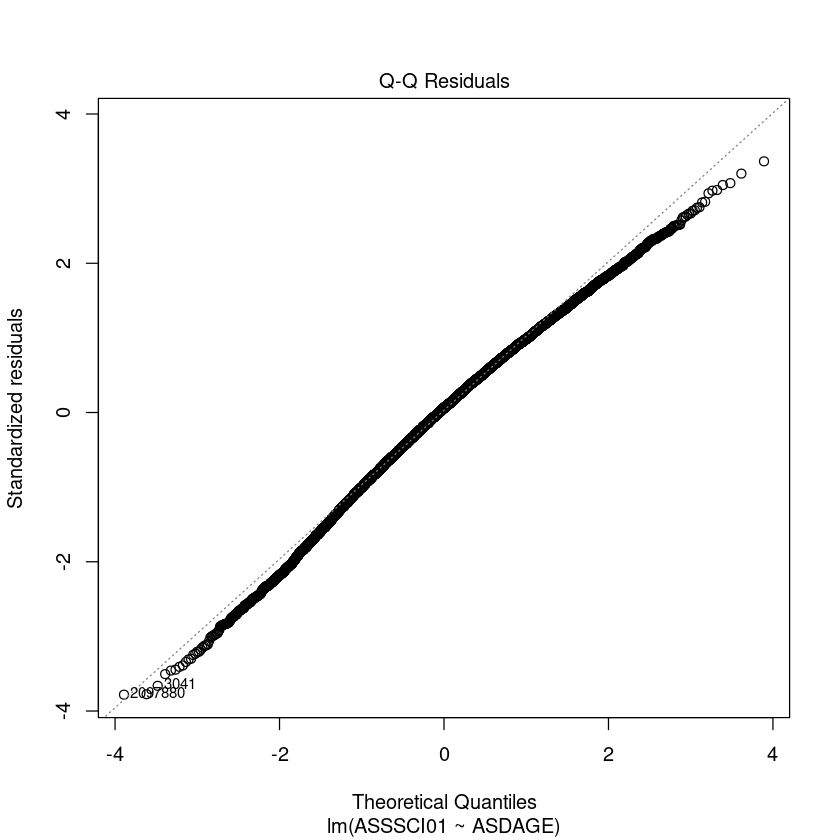

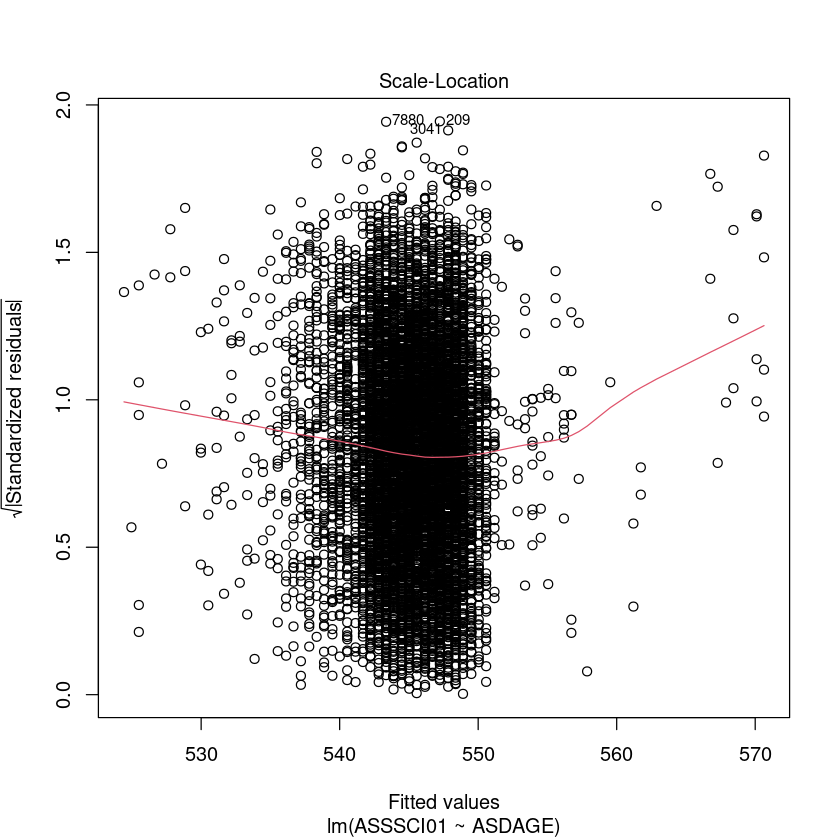

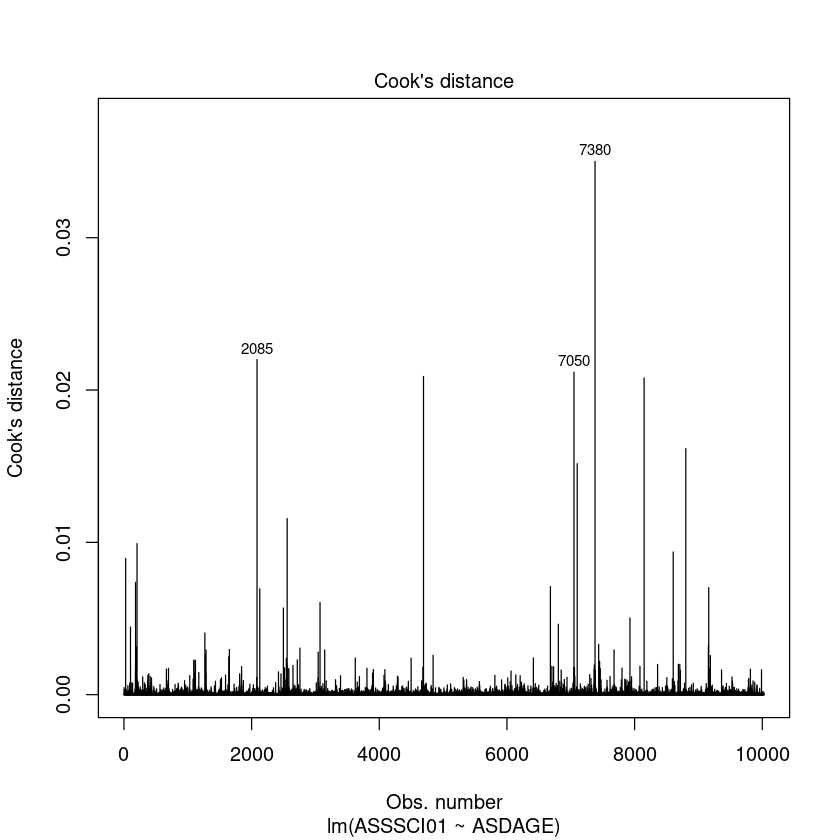

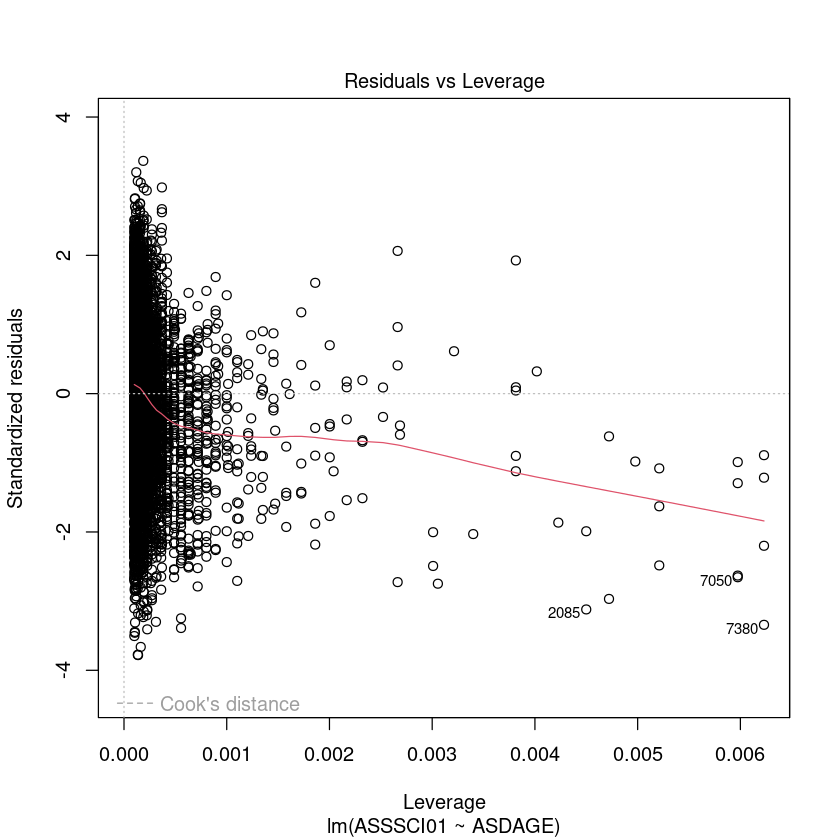

In [24]:
plot(timss_model, which = 1:5)

## Resample these data

For the astronauts data, to resample, a similar idea can be made. Essentially, we are treating these data as a random sample of some population of space missions. We again, would resample, with replacement, which means that multiple missions would likely show up in the resampling procedure. 

In [27]:
slice_sample(timss, n = nrow(timss), replace = TRUE) |> 
  count(IDSTUD) |> 
  arrange(-n)

IDSTUD,n
<dbl>,<int>
830416,7
70203,6
410606,6
910421,6
1030413,6
1040607,6
1260211,6
2020318,6
2450118,6


In [41]:
resamp_lm <- slice_sample(timss, n = nrow(timss), replace = TRUE) %>%
  lm(ASSSCI01 ~ ASDAGE, data = .)

summary(resamp_lm)
confint(resamp_lm)


Call:
lm(formula = ASSSCI01 ~ ASDAGE, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-305.586  -51.275    3.624   58.060  273.430 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  627.003     17.048  36.778  < 2e-16 ***
ASDAGE        -8.060      1.667  -4.835 1.35e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 81.22 on 10025 degrees of freedom
Multiple R-squared:  0.002327,	Adjusted R-squared:  0.002227 
F-statistic: 23.38 on 1 and 10025 DF,  p-value: 1.349e-06


,2.5 %,97.5 %
(Intercept),593.58494,660.420601
ASDAGE,-11.32727,-4.792449


### Questions to consider

1. Do the parameter estimates differ from before? Why or why not? 
2. Would you come to substantially different conclusions from the original analysis? Why or why not?

Let's now repeat this a bunch of times. 

In [42]:
set.seed(2022)

resample_timss <- function(data, model_equation) {
  timss_resample <- slice_sample(data, n = nrow(data), replace = TRUE)
    
  lm(model_equation, data = timss_resample) |>
    coef()
}

Run this function a bunch of times manually, what happens to the estimates? Why is this happening? 

In [49]:
resample_timss(data = timss, model_equation = ASSSCI01 ~ ASDAGE)

(Intercept)      ASDAGE 
 605.997639   -5.882418

## Make sure future.apply is installed

The following code chunk makes sure the future.apply function is installed for parallel processing in R. If you get an error, you can uncomment (delete the `#` symbol) in the first line of code to (hopefully) install the package yourself.

In [50]:
install.packages("future.apply")
library(future.apply)

plan(multisession)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: future



## Replicate

The following code replicates the analysis many times. Pick an initial value for N and fill in the model equation to match your code above. I will ask you to change this N value later.

In [53]:
timss_coef <- future.apply::future_replicate(10000, resample_timss(data = timss, 
                        model_equation = ASSSCI01 ~ ASDAGE), simplify = FALSE) |>
                        dplyr::bind_rows() |> 
                        tidyr::pivot_longer(cols = everything())

head(timss_coef)

name,value
<chr>,<dbl>
(Intercept),607.677204
ASDAGE,-6.094476
(Intercept),592.531417
ASDAGE,-4.582221
(Intercept),636.927365
ASDAGE,-9.003544


## Visualize results

The following code visualizes the results of the analysis above. Explore the following questions. 

1. What does this distribution show/represent? 
2. What are key features of this distribution? 
3. How do these values compare to the original linear regression results? 
    + Are there comparable statistics here compared to those?

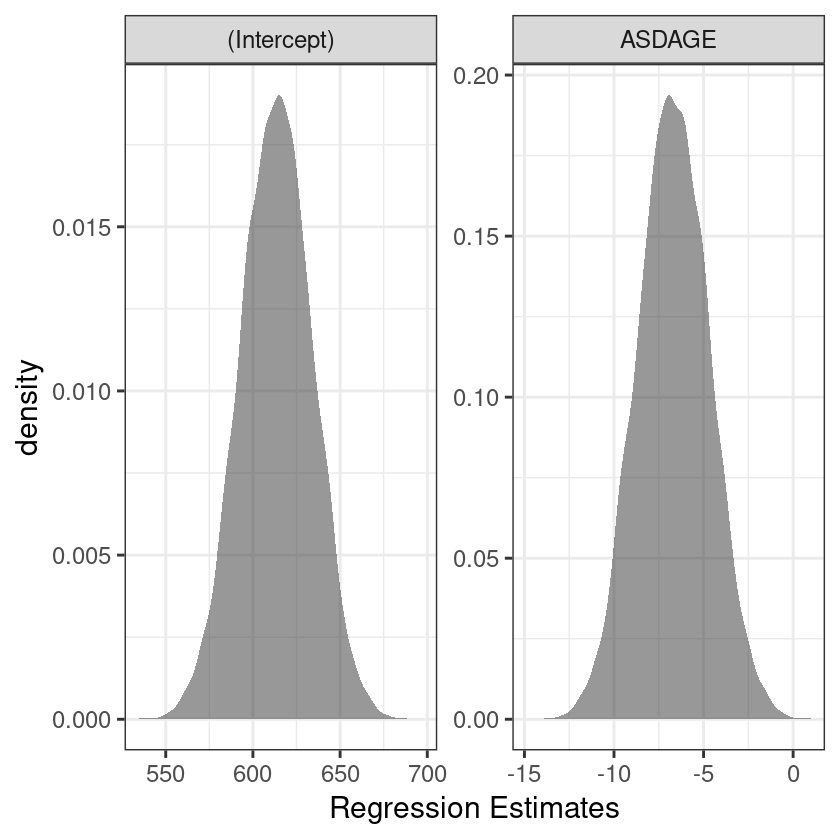

In [54]:
gf_density(~ value, data = timss_coef) |>
  gf_facet_wrap(~ name, scales = 'free') |>
  gf_labs(x = "Regression Estimates")

In [55]:
df_stats(value ~ name, data = timss_coef, mean, median, sd, IQR, length)

response,name,mean,median,sd,IQR,length
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
value,(Intercept),613.452070,613.608677,20.498675,28.046407,10000
value,ASDAGE,-6.675335,-6.692048,2.007533,2.747708,10000


In [57]:
df_stats(value ~ name, data = timss_coef, quantile(c(0.025, 0.975)))

response,name,2.5%,97.5%
<chr>,<chr>,<dbl>,<dbl>
value,(Intercept),572.85602,652.867656
value,ASDAGE,-10.51727,-2.699874


In [58]:
confint(timss_model)

,2.5 %,97.5 %
(Intercept),580.114047,647.012616
ASDAGE,-9.957345,-3.415915


In [56]:
summary(timss_model)


Call:
lm(formula = ASSSCI01 ~ ASDAGE, data = timss)

Residuals:
     Min       1Q   Median       3Q      Max 
-305.769  -51.969    4.919   56.707  272.217 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  613.563     17.064  35.956  < 2e-16 ***
ASDAGE        -6.687      1.669  -4.007 6.18e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 80.89 on 10025 degrees of freedom
Multiple R-squared:  0.001599,	Adjusted R-squared:  0.0015 
F-statistic: 16.06 on 1 and 10025 DF,  p-value: 6.183e-05


In [59]:
(-6.687 - 0) / 2.0075

[1] -3.331009

In [60]:
pt(-3.331, df = 10025, lower.tail = TRUE) * 2

[1] 0.0008684728

## Change the N value

Now, change the N value for the replicate step (you can either add a new cell to copy/paste the code or just change it in the code above). 

+ What happens to the resulting figure when the N increases?
+ What value for N seems to be reasonable? Why?